# Nguyễn Trần Gia Sĩ - 22000715

# KHÁM PHÁ DỮ LIỆU

Dữ liệu chứa trong file `tips.csv` chứa thông tin tiền tip của khách hàng tại một nhà hàng. Dữ liệu có các thông tin sau:

- `total_bill`: tổng hoá đơn (USD)
- `tip`: tiền tip/ tiền boa (USD)
- `sex`: giới tính người thanh toán hóa đơn
- `smoker`: có hút thuốc hay không
- `day`: ngày trong tuần
- `time`: thời gian dùng bữa(buổi sáng, buổi trưa, buổi tối)
- `size`: số lượng người tham gia

Bạn hãy thực hiện thống kê mô tả để tìm hiểu về hành vi tip của khách hàng tại nhà hàng

In [2]:
import pandas as pd

df = pd.read_csv('tips.csv')
df.info()
df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  244 non-null    int64  
 1   total_bill  244 non-null    float64
 2   tip         244 non-null    float64
 3   sex         244 non-null    object 
 4   smoker      244 non-null    object 
 5   day         244 non-null    object 
 6   time        244 non-null    object 
 7   size        244 non-null    int64  
dtypes: float64(2), int64(2), object(4)
memory usage: 15.4+ KB


,Unnamed: 0,total_bill,tip,sex,smoker,day,time,size
0,0,16.99,1.01,Female,No,Sun,Dinner,2
1,1,10.34,1.66,Male,No,Sun,Dinner,3
2,2,21.01,3.50,Male,No,Sun,Dinner,3
3,3,23.68,3.31,Male,No,Sun,Dinner,2
4,4,24.59,3.61,Female,No,Sun,Dinner,4


In [10]:
df.shape


(244, 9)

In [11]:
df.head(244)

,Unnamed: 0,total_bill,tip,sex,smoker,day,time,size,tip_rate
0,0,16.99,1.01,Female,No,Sun,Dinner,2,5.944673
1,1,10.34,1.66,Male,No,Sun,Dinner,3,16.054159
2,2,21.01,3.50,Male,No,Sun,Dinner,3,16.658734
3,3,23.68,3.31,Male,No,Sun,Dinner,2,13.978041
4,4,24.59,3.61,Female,No,Sun,Dinner,4,14.680765
...,...,...,...,...,...,...,...,...,...
239,239,29.03,5.92,Male,No,Sat,Dinner,3,20.392697
240,240,27.18,2.00,Female,Yes,Sat,Dinner,2,7.358352
241,241,22.67,2.00,Male,Yes,Sat,Dinner,2,8.822232
242,242,17.82,1.75,Male,No,Sat,Dinner,2,9.820426


In [3]:
df[['total_bill','tip']].describe()

,total_bill,tip
count,244.000000,244.000000
mean,19.785943,2.998279
std,8.902412,1.383638
min,3.070000,1.000000
25%,13.347500,2.000000
50%,17.795000,2.900000
75%,24.127500,3.562500
max,50.810000,10.000000


In [4]:
# Thống kê tỉ lệ tip so với tổng hoá đơn
df['tip_rate'] = df['tip'] / df['total_bill'] * 100
df['tip_rate'].describe()


count    244.000000
mean      16.080258
std        6.107220
min        3.563814
25%       12.912736
50%       15.476977
75%       19.147549
max       71.034483
Name: tip_rate, dtype: float64

In [8]:
# Phân tích nhóm danh mục
df.groupby('sex')[['total_bill','tip','tip_rate']].mean()


,total_bill,tip,tip_rate
sex,,,
Female,18.056897,2.833448,16.649074
Male,20.744076,3.089618,15.765055


In [13]:
# Phân tích khách hàng có hút thuốc hay không
df.groupby('smoker')[['total_bill','tip','tip_rate']].mean()

,total_bill,tip,tip_rate
smoker,,,
No,19.188278,2.991854,15.932846
Yes,20.756344,3.008710,16.319604


In [14]:
# Phân tích theo ngày
df.groupby('day')[['total_bill','tip','tip_rate']].mean()

,total_bill,tip,tip_rate
day,,,
Fri,17.151579,2.734737,16.991303
Sat,20.441379,2.993103,15.315172
Sun,21.410000,3.255132,16.689729
Thur,17.682742,2.771452,16.127563


## HIỂU DỮ LIỆU

1. Đọc dữ liệu
2. Xoá cột `Unnamed: 0`
3. Cho biết dữ liệu có bao nhiêu dòng, bao nhiêu thuộc tính.
4. Trong các thuộc tính, thuộc tính nào là thuộc tính phân loại, thuộc tính nào là thuộc tính định lượng
5. Có bao nhiêu nam, bao nhiêu nữ. Tỷ lệ bao nhiêu?
6. Có bao nhiêu người hút thuốc. Tỷ lệ bao nhiêu?
7. Ngày nào trong tuần khách hàng hay đến dùng bữa nhất. Tỷ lệ bao nhiêu?
8. Nhà hàng phục vụ bữa ăn nào nhiều nhất (Breakfast, Lunch, Dinner)?
9. Nhóm khách hàng dùng bữa tại nhà hàng nhiều nhất là bao nhiêu người?
10. Trung bình trong một bữa ăn nhà hàng phục vụ mấy khách?

In [17]:
# Câu 1 - 2: Xoá cột Unnamed: 0
import pandas as pd

df = pd.read_csv('tips.csv')

if 'Unnamed: 0' in df.columns:
    df = df.drop('Unnamed: 0', axis=1)

In [20]:
# Câu 3: Cho biết dữ liệu có bao nhiêu dòng, bao nhiêu thuộc tính.
df.shape

(244, 7)

Câu 4. Trong các thuộc tính, thuộc tính nào là thuộc tính phân loại, thuộc tính nào là thuộc tính định lượng
Thuộc tính định lượng
- total_bill
- tip
- size

Thuộc tính phân loại:
- sex 
- smoker
- day
- time

In [24]:
# Câu 5. Có bao nhiêu nam, bao nhiêu nữ. Tỷ lệ bao nhiêu?
gender = df['sex'].value_counts()
print("Số lượng theo giới tính:")
print(gender)

gender_ratio = df['sex'].value_counts(normalize=True) * 100
print("\nTỷ lệ phần trăm theo giới tính:")
print(gender_ratio)

Số lượng theo giới tính:
sex
Male      157
Female     87
Name: count, dtype: int64

Tỷ lệ phần trăm theo giới tính:
sex
Male      64.344262
Female    35.655738
Name: proportion, dtype: float64


In [26]:
# Câu 6. Có bao nhiêu người hút thuốc. Tỷ lệ bao nhiêu?
smoker_counts = df['smoker'].value_counts()
print("Số lượng theo thuộc tính hút thuốc:")
print(smoker_counts)

smoker_ratio = df['smoker'].value_counts(normalize=True) * 100
print("\nTỷ lệ phần trăm theo thuộc tính hút thuốc:")
print(smoker_ratio)

Số lượng theo thuộc tính hút thuốc:
smoker
No     151
Yes     93
Name: count, dtype: int64

Tỷ lệ phần trăm theo thuộc tính hút thuốc:
smoker
No     61.885246
Yes    38.114754
Name: proportion, dtype: float64


In [28]:
# Câu 7. Ngày nào trong tuần khách hàng hay đến dùng bữa nhất. Tỷ lệ bao nhiêu?
day_counts = df['day'].value_counts()
print("Số lượng khách theo từng ngày:")
print(day_counts)

day_ratio = df['day'].value_counts(normalize=True) * 100
print("\nTỷ lệ phần trăm theo ngày:")
print(day_ratio)

Số lượng khách theo từng ngày:
day
Sat     87
Sun     76
Thur    62
Fri     19
Name: count, dtype: int64

Tỷ lệ phần trăm theo ngày:
day
Sat     35.655738
Sun     31.147541
Thur    25.409836
Fri      7.786885
Name: proportion, dtype: float64


In [30]:
# Câu 8. Nhà hàng phục vụ bữa ăn nào nhiều nhất (Breakfast, Lunch, Dinner)?
time_counts = df['time'].value_counts()
print("Số lượng từng bữa ăn:")
print(time_counts)

# Câu 9. Nhóm khách hàng dùng bữa tại nhà hàng nhiều nhất là bao nhiêu người?
size_counts = df['size'].value_counts()
print("Số lượng các nhóm khách theo kích thước:")
print(size_counts)

# Câu 10. Trung bình trong một bữa ăn nhà hàng phục vụ mấy khách?
avg_size = df['size'].mean()
print("Trung bình số khách trong một bữa ăn:", avg_size)


Số lượng từng bữa ăn:
time
Dinner    176
Lunch      68
Name: count, dtype: int64
Số lượng các nhóm khách theo kích thước:
size
2    156
3     38
4     37
5      5
1      4
6      4
Name: count, dtype: int64
Trung bình số khách trong một bữa ăn: 2.569672131147541


## YẾU TỐ ẢNH HƯỞNG ĐẾN TIỀN TIP

Trong phần này, chúng ta thử tìm hiểu về tiền tip tại nhà hàng và các yếu tố có thể ảnh hưởng đến nó

1. Tỷ lệ nhận được tiền tip của nhà hàng là bao nhiêu?
2. Tỷ lệ tiền tip trên tổng hóa đơn là bao nhiêu?
3. Giữa nam và nữ ai tip nhiều tiền hơn, ai tip thường xuyên hơn?
4. Giữa người hút thuốc và người không hút thuốc ai tip nhiều tiền hơn, ai tip thường xuyên hơn?
5. Thống kê tổng số tiền tip nhận được theo ngày.

In [31]:
# 1. Tỷ lệ nhận được tiền tip của nhà hàng là bao nhiêu?
soluong = df[df['tip'] > 0].shape[0]

total = df.shape[0]

phantram = soluong / total * 100
print(f"Tỷ lệ giao dịch có tiền tip: {phantram:.2f}%")


Tỷ lệ giao dịch có tiền tip: 100.00%


In [32]:
# 2. Tỷ lệ tiền tip trên tổng hóa đơn là bao nhiêu?
df['tip_rate'] = df['tip'] / df['total_bill'] * 100
trungbinh = df['tip_rate'].mean()
print(f"Tỷ lệ tiền tip trên tổng hóa đơn trung bình: {trungbinh:.2f}%")

Tỷ lệ tiền tip trên tổng hóa đơn trung bình: 16.08%


In [34]:
# 3. Giữa nam và nữ ai tip nhiều tiền hơn, ai tip thường xuyên hơn?
gender = df.groupby('sex')[['tip', 'tip_rate']].mean()
print(gender)

             tip   tip_rate
sex                        
Female  2.833448  16.649074
Male    3.089618  15.765055


In [35]:
# 4. Giữa người hút thuốc và người không hút thuốc ai tip nhiều tiền hơn, ai tip thường xuyên hơn?
smoker = df.groupby('smoker')[['tip', 'tip_rate']].mean()
print(smoker)

             tip   tip_rate
smoker                     
No      2.991854  15.932846
Yes     3.008710  16.319604


In [36]:
# 5. Thống kê tổng số tiền tip nhận được theo ngày
day_tip_sum = df.groupby('day')['tip'].sum()
print(day_tip_sum)


day
Fri      51.96
Sat     260.40
Sun     247.39
Thur    171.83
Name: tip, dtype: float64


# TRỰC QUAN DỮ LIỆU

Để dễ hình dung, bạn hãy trực quan với một số câu hỏi sau đây:

1. Vẽ đồ thị thể hiện tổng tiền tip theo ngày
2. Vẽ đồ thị thể hiện tổng tiền tip theo bữa ăn (time)
3. Vẽ đồ thị histogram của tổng hoá đơn
4. Vẽ đồ thị boxplot của tổng hoá đơn
5. Vẽ đồ thị để kiểm tra sự liên quan giữa tổng hoá đơn và tiền tip.
6. So sánh số tiền mà khách hàng đã chi giữa các ngày trong tuần.

## Với Matplotlib

Bạn hãy trực quan với thư viện matplotlib

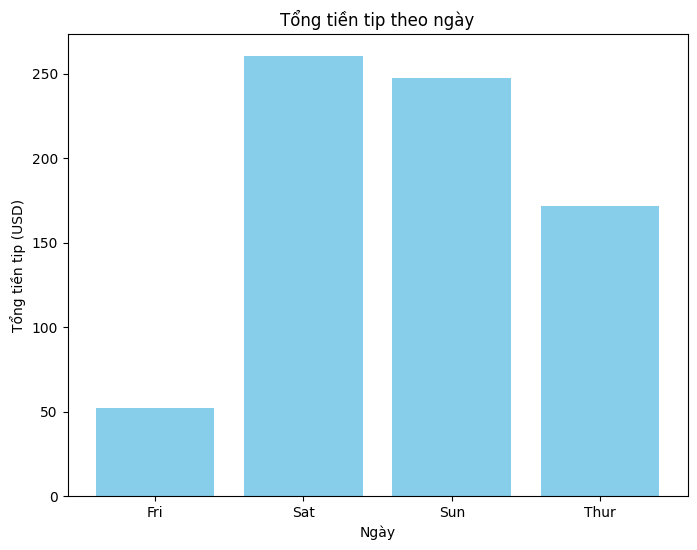

In [38]:
import matplotlib.pyplot as plt

# 1. Tính tổng tip theo ngày
day_tip = df.groupby('day')['tip'].sum().sort_index()

plt.figure(figsize=(8,6))
plt.bar(day_tip.index, day_tip.values, color='skyblue')
plt.title('Tổng tiền tip theo ngày')
plt.xlabel('Ngày')
plt.ylabel('Tổng tiền tip (USD)')
plt.show()


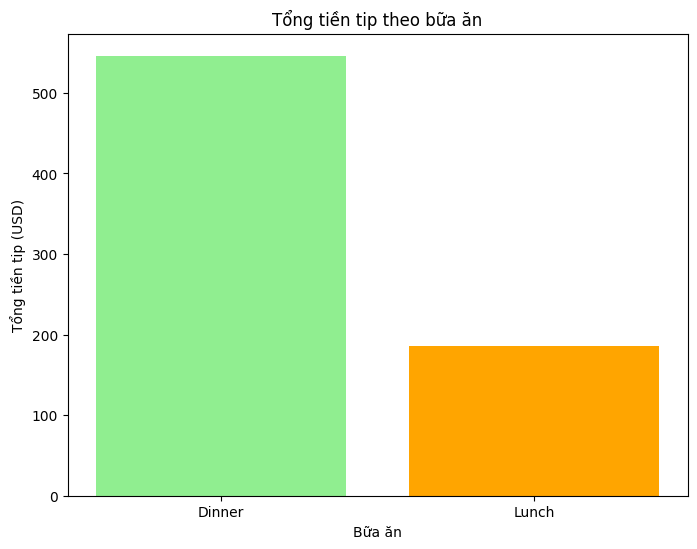

In [39]:
#2. Tính tổng tip theo bữa ăn (thời gian)
time_tip = df.groupby('time')['tip'].sum()

plt.figure(figsize=(8,6))
plt.bar(time_tip.index, time_tip.values, color=['lightgreen', 'orange'])
plt.title('Tổng tiền tip theo bữa ăn')
plt.xlabel('Bữa ăn')
plt.ylabel('Tổng tiền tip (USD)')
plt.show()


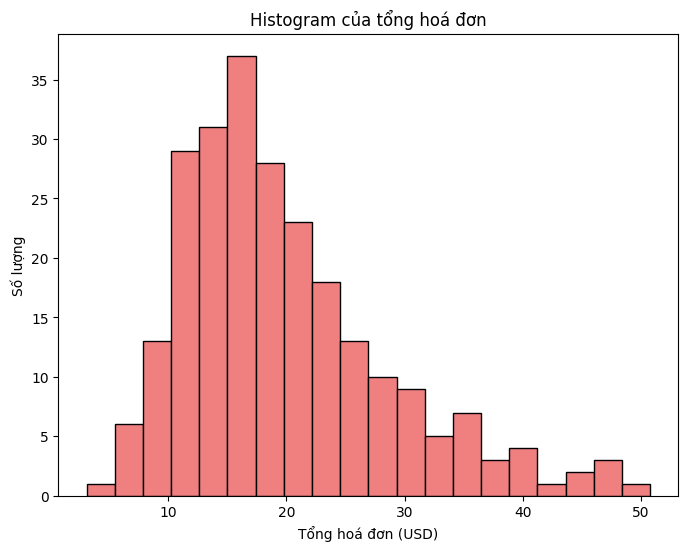

In [40]:
# 3. Vẽ đồ thị histogram của tổng hoá đơn
plt.figure(figsize=(8,6))
plt.hist(df['total_bill'], bins=20, color='lightcoral', edgecolor='black')
plt.title('Histogram của tổng hoá đơn')
plt.xlabel('Tổng hoá đơn (USD)')
plt.ylabel('Số lượng')
plt.show()

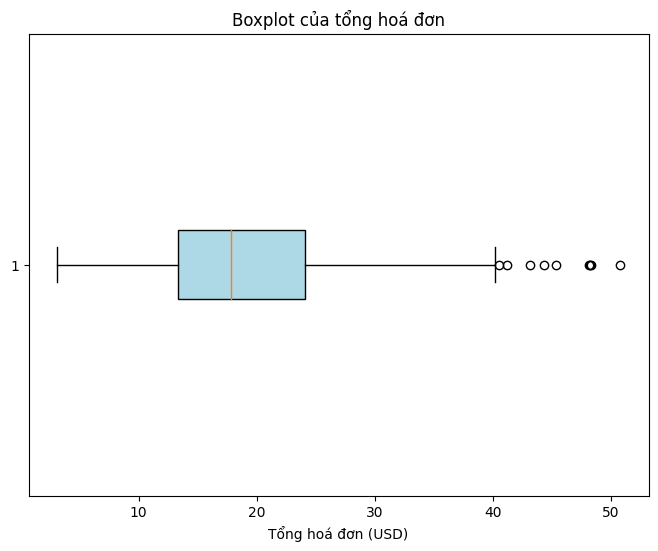

In [41]:
#4. Vẽ đồ thị boxplot của tổng hoá đơn
plt.figure(figsize=(8,6))
plt.boxplot(df['total_bill'], vert=False, patch_artist=True,
            boxprops=dict(facecolor='lightblue'))
plt.title('Boxplot của tổng hoá đơn')
plt.xlabel('Tổng hoá đơn (USD)')
plt.show()


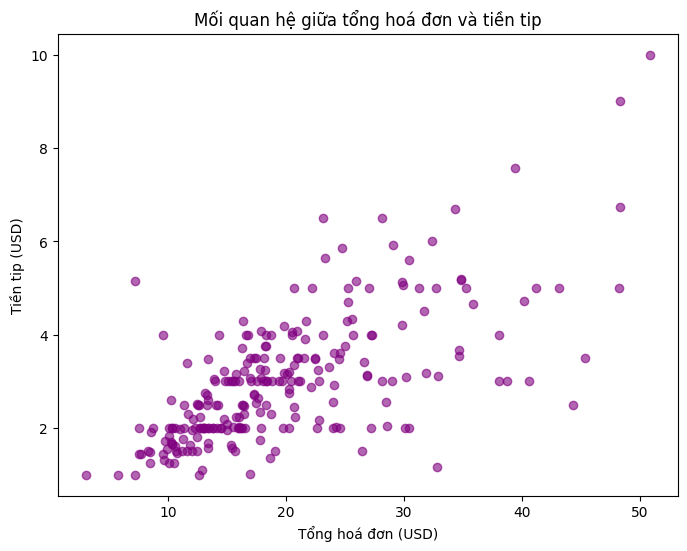

In [42]:
# 5. Vẽ đồ thị kiểm tra sự liên quan giữa tổng hoá đơn và tiền tip
plt.figure(figsize=(8,6))
plt.scatter(df['total_bill'], df['tip'], alpha=0.6, color='purple')
plt.title('Mối quan hệ giữa tổng hoá đơn và tiền tip')
plt.xlabel('Tổng hoá đơn (USD)')
plt.ylabel('Tiền tip (USD)')
plt.show()

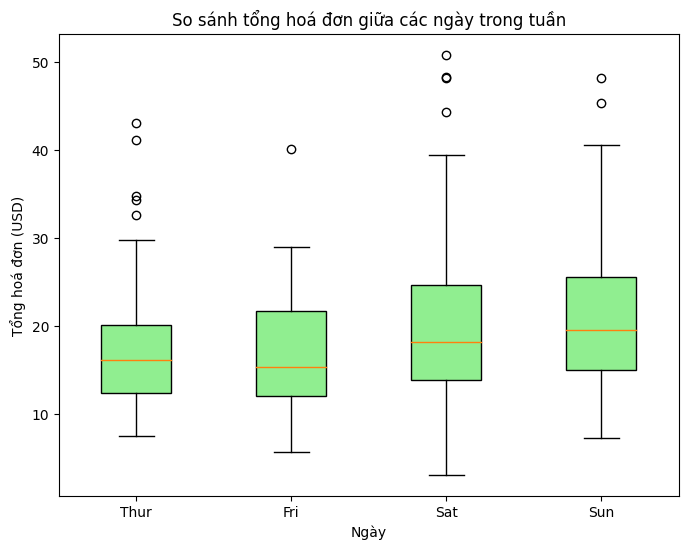

In [43]:
# 6. So sánh số tiền khách hàng chi (total_bill) giữa các ngày trong tuần
order = ['Thur', 'Fri', 'Sat', 'Sun']

plt.figure(figsize=(8,6))
data = [df[df['day'] == day]['total_bill'] for day in order]
plt.boxplot(data, labels=order, patch_artist=True,
            boxprops=dict(facecolor='lightgreen'))
plt.title('So sánh tổng hoá đơn giữa các ngày trong tuần')
plt.xlabel('Ngày')
plt.ylabel('Tổng hoá đơn (USD)')
plt.show()


## Với Seaborn

Bạn hãy tìm hiểu và trực quan với thư viện seaborn

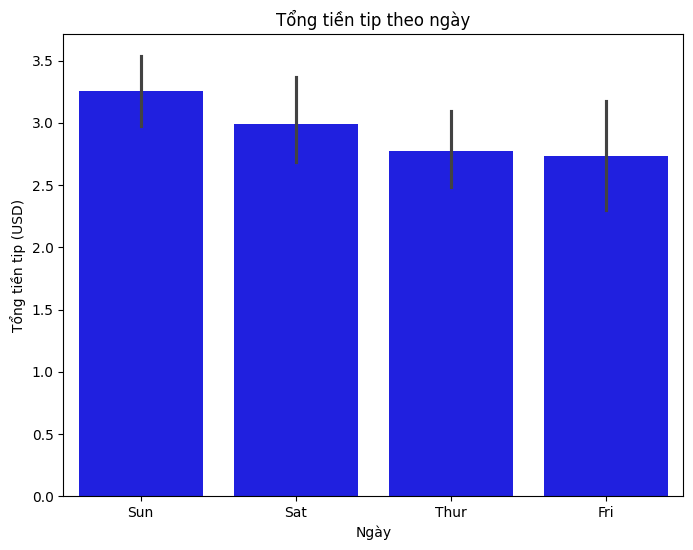

In [50]:
import seaborn as sns

#1. Vẽ đồ thị thể hiện tổng tiền tip theo ngày
plt.figure(figsize=(8,6))
sns.barplot(x='day', y='tip', data=df, color="b")
plt.title('Tổng tiền tip theo ngày')
plt.xlabel('Ngày')
plt.ylabel('Tổng tiền tip (USD)')
plt.show()

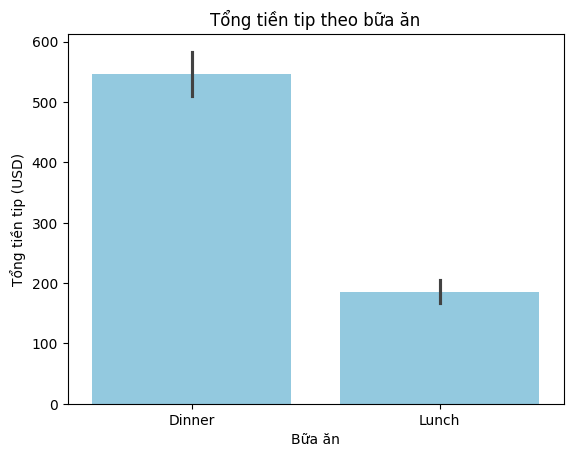

In [49]:
#2. Vẽ đồ thị thể hiện tổng tiền tip theo bữa ăn (time)
sns.barplot(x='time', y='tip', data=df, estimator=sum, color="skyblue")
plt.title('Tổng tiền tip theo bữa ăn')
plt.xlabel('Bữa ăn')
plt.ylabel('Tổng tiền tip (USD)')
plt.show()

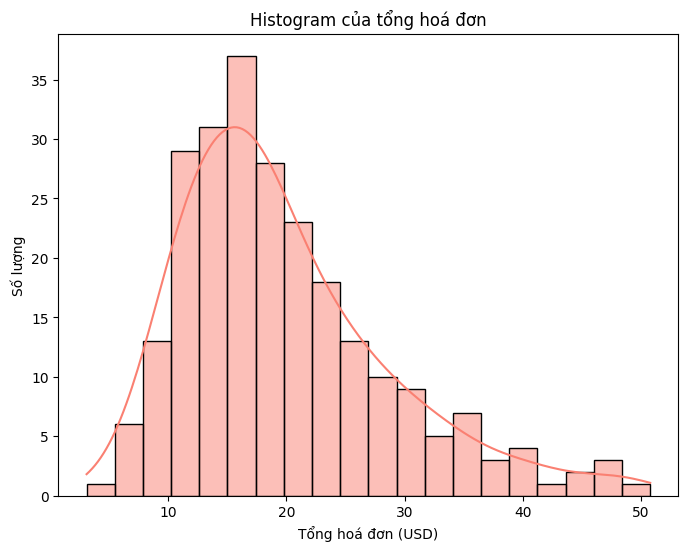

In [52]:
#3. Vẽ đồ thị histogram của tổng hoá đơn
plt.figure(figsize=(8,6))
sns.histplot(df['total_bill'], bins=20, kde=True, color='salmon')
plt.title('Histogram của tổng hoá đơn')
plt.xlabel('Tổng hoá đơn (USD)')
plt.ylabel('Số lượng')
plt.show()

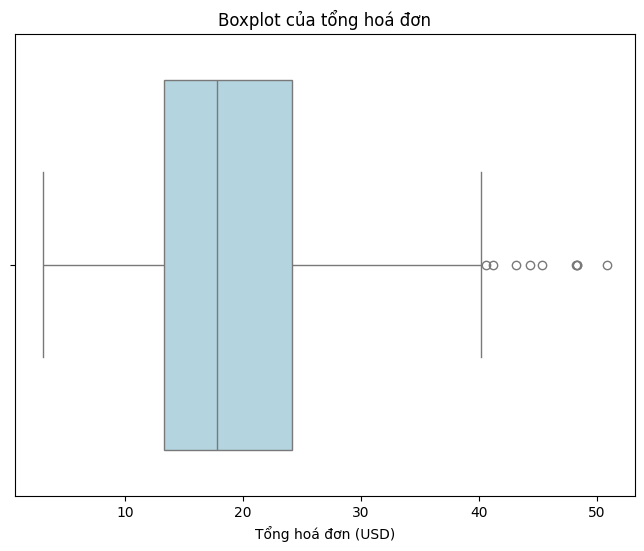

In [53]:
#4. Vẽ đồ thị boxplot của tổng hoá đơn
plt.figure(figsize=(8,6))
sns.boxplot(x=df['total_bill'], color='lightblue')
plt.title('Boxplot của tổng hoá đơn')
plt.xlabel('Tổng hoá đơn (USD)')
plt.show()

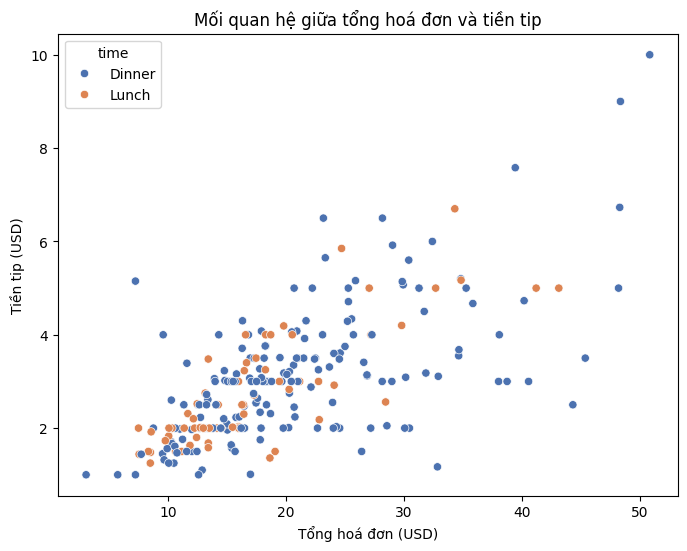

In [54]:
#5. Vẽ đồ thị để kiểm tra sự liên quan giữa tổng hoá đơn và tiền tip
plt.figure(figsize=(8,6))
sns.scatterplot(x='total_bill', y='tip', data=df, hue='time', palette="deep")
plt.title('Mối quan hệ giữa tổng hoá đơn và tiền tip')
plt.xlabel('Tổng hoá đơn (USD)')
plt.ylabel('Tiền tip (USD)')
plt.show()


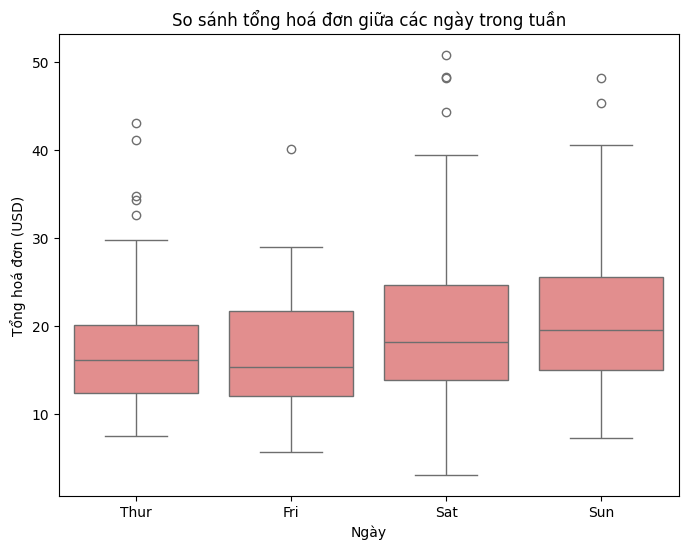

In [55]:
#6. So sánh số tiền mà khách hàng đã chi giữa các ngày trong tuần
plt.figure(figsize=(8,6))
sns.boxplot(x='day', y='total_bill', data=df, order=['Thur', 'Fri', 'Sat', 'Sun'], color="lightcoral")
plt.title('So sánh tổng hoá đơn giữa các ngày trong tuần')
plt.xlabel('Ngày')
plt.ylabel('Tổng hoá đơn (USD)')
plt.show()